<a href="https://colab.research.google.com/github/Sprexatura/RustPython/blob/main/05_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 8.8 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

# Image Classification

본 장에서는 딥러닝의 작동 방식을 철저히 분석하는 시간을 가져보자!
영상 처리, 자연어 처리, 테이블 데이터 모델 등의 구조적 이해와 특정 도메인 요구사항에 부합하는 구조를 만드는 방법, 최고의 학습 결과를 끌어내는 방법, 더 빠르게 학습을 수행하는 방법, 데이터 셋이 바뀌면 처리해줘야 하는 작업의 내용을 포함
다음 두 사항을 추가합니다
- 애플리케이션 개선하기
- 다양한 종류의 데이터에 적용하기


## From Dogs and Cats to Pet Breeds

1장에서 만든 모델을 "품종 구별도 가능하도록" 확장합니다.
이미 이전에 PETS 데이터 셋을 받았기에 다음과 같이 다운로드한 Dataset의 경로를 얻을 수 있습니다.

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

각 이미지에서 품종을 알기 위해서 먼저 데이터의 구성 방식을 이해해야 합니다.
일반적으로 다음 두 방식으로 제공됩니다.
- 개별 파일이 텍스트 문서, 이미지 같은 개별 데이터 요소에 대응합니다. 그리고 폴더나 파일명에 각 데이터의 추가 정보가 있습니다.
- 테이블 형식의 데이터(예: CSV)로 제공됩니다. 이때 각 행은 개별 데이터를 표현하며, 열 중에는 파일명을 담당하는 열이 있기도 합니다. 파일명은 테이블로 표현된 데이터를 실제 텍스트 문서나 이미지 같은 데이터로 연결하는 역할을 합니다.

일반적으로 데이터 셋에 포함된 내용은 ls 메서드로 확인할 수 있습니다.

In [4]:
#hide
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('annotations'),Path('images')]

데이터 셋에 *images* 와 *annotations* 디렉터리가 포함되어 있습니다.

데이터셋을 제공하는 [website](https://www.robots.ox.ac.uk/~vgg/data/pets/) 는 *annotations* 디렉터리가 반려동물의 품종이 아니라 이미지 내 해당 동물이 위치한 좌표 정보를 담고 있다고 알려줍니다.
위치 파악 문제가 아닌 반려동물의 품종을 알아내는 분류 문제이기에 *images* 디렉터리 내용만 확인합니다.

In [6]:
(path/"images").ls()

(#7393) [Path('images/British_Shorthair_27.jpg'),Path('images/pomeranian_184.jpg'),Path('images/wheaten_terrier_195.jpg'),Path('images/Egyptian_Mau_96.jpg'),Path('images/Birman_90.jpg'),Path('images/Persian_194.jpg'),Path('images/boxer_17.jpg'),Path('images/keeshond_16.jpg'),Path('images/Maine_Coon_3.jpg'),Path('images/havanese_74.jpg')...]

fastai 라이브러리 중 컬렉션을 반환하는 함수나 메서드는 대부분 `L`이라는 클래스를 반환합니다. 이 클래스는 파이썬 `list` 자료형에 편리한 기능을 추가하여 강화한 버전입니다.
가령 노트북 환경에서 이 클래스 객체를 출력하면, 위와 같은 결과를 확인 할 수 있습니다.
`#` 문자로 시작하는 가장 첫 번째 정보는 컬렉션이 포함한 요소의 개수입니다.
다음 출력으로 요소의 실제 목록의 일부를 나타냅니다.
추출된 파일명은 품종, 밑줄(`_`), 숫자, 확장자로 구성됩니다.
(e. g. `Birman_105.jpg`)
여기서 품종 정보를 얻을 수 있으므로 이를 추출하는 코드가 필요합니다.
간단한 파일을 하나 골라서 코드를 검증합니다.

In [7]:
fname = (path/"images").ls()[0]

파일명에서 품종을 추출하기 위해 정규표현식(`regular expression, regex`)을 사용합니다.

위에서 얻은 `fname`에 정규표현식을 적용합니다.

In [8]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['British_Shorthair']

이 정규 표현식은 마지막 밑줄 문자다음에 하나 이상의 숫자와 JPG 확장자가 등장하면 그 이전에 포함된 모든 문자열을 추출합니다.

일부 샘플에서 잘 동작하는 것을 확인했으니 전체 데이터셋 레이블링에 적용합니다.
fastai는 정규 표현식을 이용해 레이블링 작업을 할 수 있도록 `RegexLabeller` 클래스를 제공합니다. 이 클래스는 데이터블록 API와 함께 사용할 수 있습니다.

NOTE: 데이터블록 API를 다시 살펴봅니다.
첫 번째는 독립변수(`Independent variables`)와 종속변수(`Dependent Variables`)의 데이터 유형을 튜플로 지정합니다. (e. g. `blocks = (ImageBlock, CategoryBlock)`)
다음 `get_items`는 파일 경로 목록을 가져오는 방법을 명시하는데 `get_image_files` 함수로 지정하면 경로에 포함된 모든 이미지 목록을 반환합니다. (기본적으로 재귀적으로 작동합니다)
검증용 데이터 셋을 미리 정의하기도 하는데, 여기서는 무작위로 학습용과 검증용을 나눌 수 있도록 `splitter=Randomsplitter(seed=42)`를 줍니다. (여기서는 `seed`고정시켜서 같은 값을 반환하도록 하였습니다)
보통 독립변수는 x로, 종속변수는 y로 표현합니다. 따라서 `get_y=???`는 데이터셋 레이블링에 쓰일 함수를 지정하는 코드가 됩니다.


In [9]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

데이터블록 생성시 다음의 두 인자는 처음 등장합니다.

```python
item_tfms=Resize(460),
batch_tfms=aug_transforms(size=224, min_scale=0.75)
```

데이터 증강 전략 중 하나인 `사전 크기 조절(presize)`를 구현합니다. 이는 좋은 성능을 유지하면서, 동시에 데이터 파괴를 최소화하는 특별한 이미지 증강 기법입니다.

## Presizing

텐서로 포장된 이미지를 GPU로 전달하려면 이미지 크기가 같아야 합니다. 그리고 수행될 데이터 증강의 계산 횟수도 최소화하는 편이 좋죠. 가능한 적은 변형으로 데이터 증강을 수행하고 이미지를 같은 크기로 변형하는 것이 권장 요구 사항입니다.
문제는 크기를 증강된 크기로 조정한 후 다양한 데이터 증강을 수행하면 불필요하게 채워진 빈 영역이나 데이터의 저하가 발생 할 수 있다는 점입니다.
사전 크기 조절(`Presizing`)은 다음 그림에 묘사한 두 전략으로 이 문제를 해결합니다.

1. 이미지 크기를 상대적으로 '크게'만듭니다. 즉 실제로 원하는 이미지보다 훨씬 더 크게 만듭니다.
2. 이미지에 공통적으로 적용할 모든 증강 연산을 하나로 구성하고, 처리 마지막 단계에서 조합된 연산들을 GPU가 단 한 번만 수행합니다. 개별 이미지에 증강 연산과 보간법을 수행하는 것과 대조되는 방식입니다.

첫 번째 단계인 크기 조절에서는 이미지를 충분히 크게 키웁니다. 정사각형으로 이미지 일부를 잘라서 크기를 조절하는 방식을 적용합니다. 학습용 데이터셋에서 잘라낼 영역은 임의로 정해지고 잘나낼 크기는 이미지 전체 너비와 높이 중 작은 쪽이 선택됩니다.
두 번째 단계에서는 모든 데이터 증강 연산을 GPU에서 수행합니다. 이때 모든 잠재적인 파괴 작업을 함께 수행하고, 마지막에 보간법을 한 번 적용합니다.


<img alt="Presizing on the training set" width="600" caption="Presizing on the training set" id="presizing" src="https://github.com/fastai/fastbook/blob/master/images/att_00060.png?raw=1">

그림은 두 단계를 보여줍니다.

1. 전체 너비나 높이를 기준으로 자르는 단계: `item_tfms`에 해당합니다. 즉 GPU로 복사되기 전 개별 이미지에 적용하는 부분입니다. 이 단계는 모든 이미지를 같은 크기로 만들어줍니다.
2. 임의의 부분을 잘라낸 후 증강하는 단계: `batch_tfms`에 해당합니다. 즉 GPU에서 한 번에 처리할 배치 단위의 데이터에 적용되어 빠르게 처리됩니다.

fastai로 이 과정을 구현하려면 요소 변환에 `Resize`를, 배치 변환에 작은 크기의 `RandomResizedCrop`을 사용해야 합니다.

In [10]:
# 아래 과정을 위해 임의로 추가
import os
#print(os.mkdir('images'))
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/GrizzlyBearJeanBeaufort.jpg/220px-GrizzlyBearJeanBeaufort.jpg'
download_url(url, 'images/grizzly.jpg')

Path('images/grizzly.jpg')

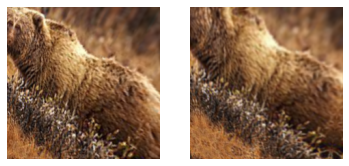

In [11]:
#hide_input
#id interpolations
#caption A comparison of fastai's data augmentation strategy (left) and the traditional approach (right).
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))

# Place an image in the 'images/grizzly.jpg' subfolder where this notebook is located before running this
dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'grizzly.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones

x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

좌측은 fastai의 접근법이고 우측은 일반적인 접근법입니다.
좌측이 더 선명하고 인위적인 반사체도 없으며 잔디도 채워져있습니다.

### Checking and Debugging a DataBlock

데이터블록을 만드는 일을 일종의 청사진(템플릿)을 작성하는 작업으로 볼 수 있습니다.
하지만 템플릿만으로 실제 데이터에서 의도한 대로 작동한다고 보장하지는 못하죠. 따라서 모델 학습 전에 데이터블록이 정상적으로 작동하는지를 항상 점검해야만 합니다.
`show_batch`가 이런 점검을 도와줍니다.

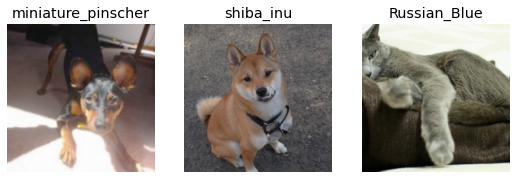

In [12]:
dls.show_batch(nrows=1, ncols=3)

올바른 품종명으로 레이블링 되었는지 점검합니다. 이 분야의 전문가가 아니라서 올바른지 판단하기 어려울 수 있습니다. 

데이터블록을 구출할 때 실수를 파악하기 어렵지만, 디버깅 목적으로 제공되는 `summary` 메서드가 도움이 됩니다. 이 메서드는 제공된 데이터의 여러 세부사항을 모두 포함한 한개의 배치를 생성하려고 시도합니다. 만약 메서드 호출이 실패하면, 에러가 발생한 정확한 지점을 확인할 수 있습니다. 


In [13]:
#hide_output
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_182.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x335
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_182.jpg
    applying partial gives
      Russian_Blue
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=500x335, TensorCategory(9))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up afte

RuntimeError: ignored

```
Setting-up type transforms pipelines
Collecting items from /home/sgugger/.fastai/data/oxford-iiit-pet/images
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/sgugger/.fastai/data/oxford-iiit-pet/images/american_bulldog_83.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=375x500
  Pipeline: partial -> Categorize
    starting from
      /home/sgugger/.fastai/data/oxford-iiit-pet/images/american_bulldog_83.jpg
    applying partial gives
      american_bulldog
    applying Categorize gives
      TensorCategory(12)

Final sample: (PILImage mode=RGB size=375x500, TensorCategory(12))

Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: ToTensor
    starting from
      (PILImage mode=RGB size=375x500, TensorCategory(12))
    applying ToTensor gives
      (TensorImage of size 3x500x375, TensorCategory(12))

Adding the next 3 samples

No before_batch transform to apply

Collating items in a batch
Error! It's not possible to collate your items in a batch
Could not collate the 0-th members of your tuples because got the following 
shapes:
torch.Size([3, 500, 375]),torch.Size([3, 375, 500]),torch.Size([3, 333, 500]),
torch.Size([3, 375, 500])
```

서로 다른 이미지 때문에 성공하지 못하였네요
이런 디버깅 과정을 거쳐서 데이터가 올바르다고 판단한 다음에 데이터로 간단한 모델을 학습시키는 것을 권장합니다.
첫 번째 테스트로 사용할 모델은 1장에서 사용한 간단한 모델과 같습니다.

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,1.486766,0.341532,0.105548,46:09


epoch,train_loss,valid_loss,error_rate,time
0,0.532266,0.343734,0.105548,1:01:31


모델을 학습시킬 때 나타나는 표는 학습의 각 에포크가 끝난 후의 결과를 보여줍니다. 한 에포크는 데이터에 포함된 이미지를 모두 한 번씩 처리했다는 뜻임을 기억해 두세요. 각 열은 학습용 및 검증용 데이터셋에서의 평균 손실 정보와 요청한 평가지표를 포함합니다. 여기서는 에러율(error_rate)이죠.

손실을 모델 파라미터를 최적화하는 데 사용하기로 한 어떤 함수도 될 수 있습니다. fastai는 사용중인 데이터와 모델의 종류에 따라 적절한 손실 함수를 고르는데 여기서는 기본적으로 `교차 엔트로피 손실(Cross-etropy-loss)` 를 선택합니다.

## Cross-Entropy Loss

`교차 엔트로피 손실(Cross-entropy loss)`은 앞 장에서 사용한 손실 함수와 유사하지만 다음의 추가 장점이 있습니다.
- 종속 변수에 범주가 둘 이상이더라도 작동합니다.
- 더 빠르고 안정적인 학습 결과를 도출합니다.

교차 엔트로피가 범주가 둘 이상인 종속 변수에 대해 작동하는 방식을 이해하려면, 먼저 손실 함수가 실제 데이터 및 활성을 바라보는 방식을 이해해야만 합니다.

### Viewing Activations and Labels

모델의 활성을 살펴봅시다.
`DataLoaders`의 `one_batch` 메서드로 실제 배치 하나를 가져옵니다.

In [ ]:
x,y = dls.one_batch()

`one_batch` 메서드는 종속변수와 독립변수를 미니배치 형태로 반환합니다. 종속 변수에 포함된 내용은 다음과 같아요.

In [ ]:
y

배치 크기가 64이므로 해당 텐서는 행이 64개입니다. 각 행의 값은 0~36사이의 정수입니다. 즉, 37종의 품종을 나타냅니다. `Learner.get_preds` 메서드로 예측값(신경망 마지막 계층의 활성)을 확인할 수 있습니다. 이 메서드는 데이터셋의 색인 번호(0은 학습용, 1은 검증용 데이터셋) 또는 배치 형식의 반복자를 입력받습니다. 따라서 배치로 간단한 리스트를 만들어서 입력하면 예측값을 얻을 수 있겠죠. 예측값에 대응하는 레이블도 반환하지만 여기서 필요하진 않으니 `_` 변수로 받환을 무시합니다.

In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

예측은 0~1 범위의 확률 37개로 구성됩니다. 그리고 이 값 37개를 모두 더하면 1이 되어야 합니다.

In [ ]:
len(preds[0]),preds[0].sum()

내부적으로 `소프트맥스(softmax)` 활성화 함수를 적용해서 모델이 내놓은 활성을 이런 형식의 출력으로 변형합니다.

### Softmax

분류 모델의 마지막 계층의 모든 활성값이 0~1이 되도록 조정하고, 모두 더하면 1이 되도록 만들기 위해 소프트맥스 활성화 함수를 사용합니다.
시그모이드와 유사한데, 시그모이드는 다음의 형태였습니다.

In [ ]:
plot_function(torch.sigmoid, min=-4,max=4)

이 함수를 신경만의 활성값으로 채운 단일 열에 적용해서 0과 1사이의 숫자로 채워진 열을 만들 수 있습니다. 마지막 계층에서 매우 유용한 활성화 함수입니다.

이번에는 범주가 더 많은 타깃(37개 품종과 같이)이 필요할 때를 생각합니다. 단일 열보다 더 많은 활성이 필요하다는 의미로, 범주당 활성 하나가 필요합니다. 더 일반적인 접근법을 터득하는 첫 번째 단계로 3과 7을 예측하는 상황을 고려해봅시다.
활성을 두 개 출력하는 신경망을 만들어야 합니다. 대신 신경망 자체를 만들지 않고, 예제의 단순화를 위해 출력 활성이 표준 편차가 2(rand에 2를 곱함)인 임의의 숫자들이라고 가정합니다.
즉 아래 코드의 acts가 두 범주 중 하나에 속하는 이미지 6장을 표현한다고 상상합니다. (첫 번째 열은 3, 두번째 열은 7을 표현)

In [ ]:
#hide
torch.random.manual_seed(42);

In [ ]:
acts = torch.randn((6,2))*2
acts

행을 더한 값이 1이 아니기 때문에 여기에 시그모이드를 바로 적용할 수는 없습니다. (3일 될 확률과 7이 될 확률을 더하면 1이 되어야 합니다)

In [ ]:
acts.sigmoid()

4장에서 만든 신경망은 이미지당 활성 하나를 출력했고, 이를 시그모이드 함수에 넣었습니다. 단일 활성이 입력된 이미지가 숫자 3인지 아닌지에 대한 모델의 예측 확률을 표현했죠. `mnist_loss`에서 그랬듯 이진 분류는 타깃을 불리언으로 다루는 특별한 유형의 문제로, 다중 범주를 다루는 일반적인 예로 볼 수 있습니다. 단지 두 범주만 다루는 상황이 주어진 것이죠. 다중 범주를 다룬 곰 분류에 사용한 신경망에서는 범주당 활성 하나를 반환합니다.
이진 분류도 출력을 두 개 내놓는 신경망으로 접근해봅시다. 그렇다면 각 활성이 나타내는 내용은 "입력이 7과 3일 될 상대적인 가능성"을 표현합니다. 즉, 이 두 값이 절대적으로 큰지 작은지보다는 둘 중 어느 값이 큰지가 중요합니다.
이는 단일 활성만 사용했던 것을 표현하는 또 다른 방식일 뿐입니다. 따라서 "두 활성을 출력하는 신경망에도 시그모이드 함수를 적용하면 어떨까?" 라고 생각해볼 수 있습니다. 우선 두 활성 간의 차이로부터 입력이 7이 아닌 3이라고 얼마나 확신 할 수 있는지를 구합니다. 그리고 그 차이에 시그모이드 함수를 씌워보죠.

In [ ]:
(acts[:,0]-acts[:,1]).sigmoid()

이렇게 3일 확률을 구했습니다. 그러면 7일 확률은 1에서 3일 확률을 빼면 됩니다. 이렇게 3과 7이라는 두 범주를 그 이상으로 확장 할 수 있습니다. 이런일을 하는 것이 바로 소프트맥스입니다.

``` python
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)
```

> 전문용어: 지수함수(`Exponential function (exp)`)
`e**x`로 정의합니다. 여기서 `e`는 값이 약 2.718 인 특별한 숫자이고 `exp`는 자연 로그의 역함수입니다. 이 함수는 항상 양수를 출력하고 매우 빠르게 증가합니다.

첫 번째 행을 대상으로 소프트맥스가 시그모이드와 같은 값을 반환하는지 알아봅시다. 그리고 1에서 그 값을 빼면 두 번째 행의 값이 되는지도 확인해봅시다.

In [ ]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

`softmax`는 시그모이드의 다중 범주 버전쯤으로 볼 수 있습니다. 범주가 둘 이상이고 각 범주의 확률의 합이 1이 되어야 하는 상황에서 언제나 사용 할 수 있습니다. 단지 두 범주만 있어도 일관성을 위해 많이 사용합니다. 모든 활성값이 0~1 사이이며 합하면 1이 되는 특성이 있는 함수를 직접 만들 수 있으나, 부드럽고 대칭적인 모양의 시그모이드 같은 함수를 만드는 것은 어렵습니다. 또한 소프트맥스는 다음 절에서 다룰 손실 함수와도 잘 동작합니다.
출력 활성인 세 개인 곰 분류 모델에 곰 이미지를 한 장 입력하면, 다음처럼 소프트맥스가 계산됩니다.

<img alt="Bear softmax example" width="280" id="bear_softmax" caption="Example of softmax on the bear classifier" src="https://github.com/fastai/fastbook/blob/master/images/att_00062.png?raw=1">

이 함수가 실제로 하는 일은 무엇일까요? 지수 함수로 모든 숫자를 양수화하고 이들을 합한 값으로 각 숫자를 나누면, 더했을 때 1이 되는 숫자를 여럿 만듭니다. 지수 함수는 여러 활성값중 하나가 다른 값보다 조금만 크더라도 그 값을 증폭시키는 속성을 가지죠. 즉 1에 가깝게 만들어 줍니다.
소프트맥스가 정말로 하려는 일은 범주들 가운데 하나를 고르는 것입니다. 따라서 각 입력에 레이블이 단 하나인 데이터를 분류하는 모델을 학습시키는 데 이상적입니다. 
교차 엔트로피 손실은 두 부분으로 구성됩니다. 첫 번째는 소프트맥스이고 두 번째는 로그 가능도(`Log Likelihood`) 입니다.

### Log Likelihood

4장에서 다룬 MNIST 예에서는 다음 함수로 손실을 계산했습니다.

```python
def mnist_loss(inputs, targets):
    inputs = inputs.sigmoid()
    return torch.where(targets==1, 1-inputs, inputs).mean()
```

시그모이드에서 소프트맥스로 변경했으므로 손실 함수도 이진 분류 이상에서 작동하는 형태로 확장해야 합니다. 즉 범주의 개수와 무관하게 분류할 수 있어야 합니다. 소프트맥스를 거친 예측 배치에 속한 활성의 값은 0~1 사이이며 모두 더하면 1입니다. 다깃값은 0과 36사이의 정수입니다.
이진 문제에서는 `torch.where`로 `inputs`과 `1-inputs` 사이를 선택했습니다. 이진 문제를 범주가 둘인 일반적인 분류 문제로 다루면, 앞 절의 `inputs`과 `1-inputs` 에 대응하는 별도의 행이 존재하기 때문에 훨씬 쉬워집니다. 따라서 올바른 행을 선택하기만 하면 됩니다. PyTorch로 구현해봅시다. 인위적으로 만든 숫자 3과 7의 레이블이 다음과 같디고 가정합니다.

In [ ]:
targ = tensor([0,1,0,1,1,0])

그리고 다음은 소프트맥스를 적용한 결과입니다.

In [ ]:
sm_acts

여기서 텐서의 색인기능을 사용해 `targ`의 각 요소에 대해 `sm_acts`의 적절한 열을 선택할 수 있습니다.

In [ ]:
idx = range(6)
sm_acts[idx, targ]

모등 열의 내용을 테이블 형식으로 표현해보면 일어나는 일을 정확히 파악할 수 있습니다. 처음 두 열은 소프트맥스를 적용한 활성값입니다. 그리고 타깃, 행 색인 번호, 직전 코드의 결과가 차례대로 표시됩니다.

In [ ]:
#hide_input
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3과 7열로 2열 행렬을 구성하고 `targ`과 `idx`열 값으로 해당 행렬을 색인하면 마지막 열을 값을 구할 수 있습니다. 이 작업이 바로 `sm_acts[idx, targ]`가 하는 일입니다.
올바른 레이블에 대응하는 손실만 선택하고 나머지는 신경 쓰지 않아도 됩니다. 소프트맥스의 정의에 따르면, 그 외의 열에 대한 활성을 모두 더한 값은 1에서 올바른 레이블의 활성을 뺀 값이기 때문이죠. 따라서 올바른 레이블의 활성을 최대한 높게 만들면 그 외의 열에 대한 활성은 감소합니다.

PyTorch 는 `sm_acts[range(n), targ]`과 정확하게 같은 일을 하는 `nll_loss`함수를 제공합니다. (단, 음수를 수용하는 점이 다릅니다. *NLL* 은 `음의 로그 가능도(Negative Log Likelihood)`를 의미합니다.)

In [ ]:
-sm_acts[idx, targ]

In [ ]:
F.nll_loss(sm_acts, targ, reduction='none')

이름에 `Log`가 있지만, `nll_loss`는 로그를 적용하진 않았습니다. 이유는 다음 절에서 살피겠지만, 그전에 로그가 유용한 이유를 먼저 살펴봅니다.

#### Taking the Log
앞 절의 `nll_log`는 손실 함수로 잘 동작합니다. 하지만 좀 더 개선이 가능합니다. 문제는 확률값이 0보다 작거나 1보다 클 수 없다는 점입니다. 즉 모델 예측값이 0.99일 때와 0.999일 때의 차이를 잘 다루지 못합니다. 두 수는 매우 근접하지만 0.999는 0.99보다 신뢰도가 10배 높다고 해석이 될 수도 있습니다. 이를 해결하려면 0~1 사이의 값을 음의 무한대와 양의 무한대로 변환해서 차이를 극명하게 만들면 됩니다. 로그(`logarithm`)라는 수학 함수가 바로 이런 변환을 수행하며, PyTouch에서는 `torch.log`로 제공됩니다. 0보다 작은 수에서 정의되지 않는 로그는 다음과 같은 모양입니다.

In [ ]:
plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')

로그(`logarithm`)가 뭔가를 떠올리게 했나요? 로그 함수는 다음과 같은 성질을 가집니다.

```
y = b**a
a = log(y,b)
```

일반적으로 `log(y,b)` 는 "밑이 b인 로그y"를 반환합니다. 그러나 PyTouch는 `log`를 이렇게 정의하지 않습니다. `e` (2.718...) 라는 특별한 수를 밑으로 사용합니다.
다음은 로그에 대해 알아야 할 핵심 개념입니다.

    log(a*b) = log(a)+log(b)

기본이 되는 신호가 곱셈 또는 지수적으로 증가할 때 로그가 선형적으로 증가한다는 의미를 가집니다. 정말 크거나 작은 숫자를 만들 수 있는 곱셈을 덧셈으로 대체하여 컴퓨터가 다루기 쉬운 척도로 변환해주기 때문에 여러 분야에서 자주 사용됩니다.

확률의 양 또는 임의 로그 평균으로 "음의 로그 가능도"를 얻을 수 있습니다. PyTouch의 nll_loss 함수는 이미 소프트맥스에 로그가 적용되었다고 가정합니다. 그래서 로그를 적용하는 과정이 포함되지 않죠.

소프트맥스 다음에 로그 가능도를 적용하는 조합을 교차 엔트로피 손실이라고 합니다. PyTouch에서는 nn.CrossEntroyLoss(실제로 log_softmax 다음에 nll_loss를 수행)로 교차 엔트로피 손실을 사용합니다

> nll_loss의 nll은 "음의 로그 기능도"를 의미하지만, 실제로는 로그를 전혀 사용하지 않습니다. 이미 로그가 적용되었다고 가정합니다. 

In [ ]:
loss_func = nn.CrossEntropyLoss()

보다시피 클래스로, 인스턴스화하여 함수처럼 작동하는 객체를 얻을 수 있습니다.

In [ ]:
loss_func(acts, targ)

PyTouch의 모든 손실 함수는 방금 본 클래스의 형식과 F 네임스페이스에서 사용할 수 있는 일반 함수, 두 가지 형식으로 제공됩니다.

In [ ]:
F.cross_entropy(acts, targ)

어느 쪽이든 잘 동작하지만, 대부분 클래스 사용을 선호하고 PyTouch의 공식 문서 및 예제에서도 자주 사용되므로 클래스를 사용합니다.
기본적으로 PyTouch의 손실 함수는 모든 항목의 평균 손실을 계산합니다.`reduction='none'` 옵션을 통해 이 행동을 비활성화 할 수 있습니다.

In [ ]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

이제 손실 함수 뒤편에 숨겨진 조각을 모두 살폈습니다. 그러나 손실은 모델이 학습을 잘 하고 있는지를 나타내는 숫자를 부여할 뿐, 이 정보만으로는 모델의 좋고 나쁨을 파악할 수 없습니다. 이제 모델의 예측을 해석하는 몇 가지 방법을 알아봅시다.

## Model Interpretation

사람이 손실 함수를 즉시 해석하기는 매우 어렵습니다. 손실함수는 컴퓨터가 미분을 구하고 최적화할 수 있도록 설계되었기 때문입니다.
평가지표는 최적화에 사용되지 않고 무슨 일이 일어나는지 사람이 보고 이해하는데 도와줍니다. 여기서는 평가지표로 정확도를 사용했습니다. 
1장에서 오차 행렬로 모델이 잘한 부분과 그렇지 못한 부분을 확인했죠.

In [ ]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

이번에는 너무 커서 읽기가 힘듭니다. 품종이 37개라서 37x37 크기의 거대한 행렬이 구성됩니다. `most_confused` 메서드가 도움을 줄 수 있습니다. 이 메서드는 오차 행렬 중 가장 올바르지 못한 예측만 보여줍니다. (다음 코드의 `min_val=5`는 최소 5번 잘못 예측한 부분만 추출하라는 의미입니다.)

In [ ]:
interp.most_confused(min_val=5)

우리는 반려동물 품종 관련 전문가가 아니므로 오류가 발생한 범주가 실제로 인식이 어려운 품좀을 반영하는지 바로 알 수는 없습니다. 다른 도움을 통해 이를 확인하는 것이 좋겠고 여기서는 구글을 통해 전문가도 꽤 의견이 갈리는 품종이 나타남을 알았습니다. 꽤 괜찮은 기준선을 구한 것 같네요. 그러면 이를 더 좋게 만들려면 무엇을 할 수 있을까요?

## Improving Our Model

여기서는 모델의 학습 능력을 개선하고 성능을 높이는 다양한 기법을 살펴봅니다. 이 과정에서 전이 학습을 좀 더 설명하고 사전 학습된 모델의 가중치를 무너뜨리지 않으면서 최대한 미세하게 조정하는 방법을 다룹니다.
모델 학습에서는 학습률을 가장 먼저 설정해야 합니다. 앞에서 학습률을 적절히 설정해야 학습이 더 효율적으로 이루어짐을 배웠습니다. 좋은 학습률은 어떻게 고를 수 있을까요? fastai는 이를 위한 도구를 제공합니다.

### The Learning Rate Finder

모델의 학습에서 올바른 학습률(The Learning Rate)을 고르는 일은 굉장히 중요합니다.
너무 낮으면 에포크가 많이 소요되어 시간 낭비 및 과적화문제가 발생 할 수 있죠. 그럼 높으면 어떤 결과를 초래할까요.


In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

결과가 좋지 않네요. 옵티마이저는 올바른 방향으로 나아갔지만 너무 많이 움직여서 최소 손실 지점을 완전히 비껴갔습니다. 이를 여러번 반복하면 점점 더 최소 지점에 가까워지지 않고 멀어집니다.
너무 크지도, 작지도 않은 완벽한 학습률을 찾는데 fastai 는 무엇을 할까요? "학습률 발견자(*learning rate finder*)" 라는 멋진 아이디어가 있습니다. 다루기 크다는 생각이 들지 않을 만큼 매우 작은 학습률부터 사용하자는 아이디어입니다. 미니 배치 하나에 선택된 학습률을 사용하고 손실을 측정합니다. 그리고 특정 비율로 학습률을 늘립니다. 그리고 다음 미니배치에서 증가된 학습률을 적용하고 손실을 측정하고 다시 학습률을 늘립니다. 손실이 나빠지기 직전까지 이를 반복합니다. 그러면 너무 많은 움직임을 만들어낸 지점을 알아낼 수 있고, 우리는 그 지점보다 약간 작은 학습률을 선택하면 됩니다. 다음 둘 중 한 규칙으로 선택하기를 권장합니다.

- 최소 손실이 발생한 지점보다 한 자릿수 작은 학습률(i. g., 최소 손실이 발생한 학습률을 10으로 나눈 값)
- 손실이 명확히 감소하는 마지막 지점

학습률 발견자는 곡선의 점들을 계산하여 판단에 도움을 줍니다. 1장에서는 학습률을 지정하지 않고 fastai가 제시하는 디폴트값(1e-3)을 사용했습니다.

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

모델을 학습시키기 좋은 학습률을 얻었습니다. 이제 사전 학습된 모델의 가중치를 미세 조정하는 방법을 알아봅시다

### Unfreezing and Transfer Learning

1장에서 이미 전이 학습 작동 방식을 간단히 다뤘습니다. 기본 아이디어는 수백만 개의 데이터로 사전 학습된 모델이 다른 작업에 대해 미세 조정된다는 것이었습니다.
이제는 합성곱 신경망이 여러 선형 계층과 이들을 잇는 비선형 계층의 조합과 그 끝에는 하나 이상의 선형 계층이 위치하며, 가장 마지막 선형계층에는 소프트맥스 같은 활성화 함수가 쓰인다는 것을 알 것입니다. 그리고 마지막 선형 계층은 모델이 분류하는 범주의 개수와 열의 크기가 같은 행렬을 사용합니다.
마지막 선형 계층이 전이 학습의 미세 조정에 사용될 가능성은 낮습니다. 사전 학습된 원본 데이터셋이 특정한 범주를 분류하도록 디자인되었기 때문이죠. 따라서 전이 학습에서는 이 계층을 모델 구조에서 제거하고 새로운 문제에 맞는 출력 개수로 구성한 새로운 선형 계층으로 교체해야만 합니다. (여기서는 품종이 37개 이므로 활성 37개로 구성합니다.
새로 추가된 선형 계층의 가중치는 완전히 임의로 지정됩니다. 그렇기 때문에 미세 조정 전까지 모델은 완전히 임의의 출력을 합니다. 마지막 계층 이전의 모든 계층은 일반적인 이미지 분류작업을 잘 해내도록 학습되었기에 모델 자체가 완전히 임의적이라는 뜻은 아닙니다.
이렇게 사전 학습된 모델의 유용한 개념을 모두 기억한 채 새로운 문제를 해결할 모델을 학습시킨다면 가장 바람직할 것입니다. 즉 새로운 문제에 특화된 일부만을 조정하는 방식이죠.
미세 조정 문제는 신중하게 사전 학습된 가중치를 망가뜨리지 않으면서, 추가된 선형 계층의 임의 가중치를 새로운 작업을 올바르게 푸는 가중치로 바꾸는 작업입니다. 간단한 기법으로 이를 가능케 할 수 있습니다. 옵티마이저는 추가된 계층의 임의 가중치만 갱신하고, 그 외의 가중치는 전혀 바꾸지 않도록 강제할 수 있겠죠. 이를 사전 학습된 계층을 동결(Freezing)시키는 기법이라고 합니다.


사전 학습된 신경망으로 모델을 만들 때, fastai는 자동으로 사전 학습된 모든 계층을 동결시킵니다. 그리고 `fine_tune` 메서드를 호출하면 다음 두 작업을 수행합니다.

- 한 에포크 동안 추가된 계층의 임의 가중치만 갱신(학습)합니다. 그 외 계층은 동결 상태를 유지합니다.
- 그다음 모든 계층의 동결을 헤제하고 요청된 에포크 수만큼 학습을 진행합니다.

이는 적당한 기본 접근법이지만, 데이터셋의 특성에 따라 약간씩 변화를 주면 더 좋은 결과를 얻을 수 있습니다. `fine_tune` 메서드 자체가 일부 행동에 변화를 주는 인자를 제공하지만, 완전한 사용자 정의 행동을 얻으려면 내부적으로 실제 호출되는 메서드를 직접 사용하는 편이 가장 명확하고 쉽습니다. 다음과 같이 코드를 확인합니다

    learn.fine_tune??

`fine_tune`는 우선 `fit_one_cylce` 메서드로 추가된 계층에 대헤 세 번의 에포크 동안 학습을 수행합니다. 1장에서 언급한 대로 `fit_one_cycle`은 `fine_tune`을 사용하지 않는 상황에서 모델 학습에 권장되는 메서드입니다. `fit_one_cycle`의 작동 원리는 13장에서 살피니 여기선 간략히 설명합니다. `fit_one_cycle`은 전체 학습을 두 부분으로 나눕니다. 우선 낮은 학습률로 학습을 시작하여 첫 번째 부분까지 점진적으로 학습률을 증가시키고 두 번째 부분에서는 다시 점진적으로 학습률을 감소시킵니다.

In [ ]:
learn.fine_tune??

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

이제 모델을 동결 해제해봅시다.

In [ ]:
learn.unfreeze()

그리고 다시 `lr_find`를 수행합니다. 학습할 계층이 더 많아졌고 세 에포크 동안 학습된 일부 가중치가 있으니 앞서 찾은 학습률이 더는 적절치 못하기 때문입니다.

In [ ]:
learn.lr_find()

임의로 초기화된 가중치만 학습했을 때 출력한 그래프와는 조금 다릅니다. 모델이 학습중임을 가리키는 가파른 절벽이 없습니다. 모델이 이미 학습되었기 때문이죠. 적당한 학습률로 학습을 시도해봅시다.

In [ ]:
learn.fit_one_cycle(6, lr_max=1e-5)

모델을 약간 개선할 수 있었습니다. 더 개선할 수도 있습니다. 사전 학습된 모델의 가장 심층부에는 마지막에 추가된 계층 정도로 높은 학습률이 필요 없을지도 모릅니다. 즉 서로 다른 계층에 서로 다른 학습률을 사용해야 할 가능성이 높다는 말이죠. 이렇게 계층마다 다른 학습률을 적용하는 방식을 `차별적 학습률(Disciminative learning rates)`라고 합니다.

### Discriminative Learning Rates

동결 해제 후에도 사전 학습에서 형성된 가중치의 품질에 주의를 깊게 기울여야 합니다. 사전 학습된 파라미터를 위한 최적의 학습률이 임의로 추가된 파라미터 학습에서만큼 크다고 생각해선 안 되겠죠. 이는 임의로 추가된 파라미터를 수 에포크 동안 수백만 장의 이미지로 학습해서 얻었음을 기억하세요.
1장에서 각 계층이 학습한 내용을 시각적으로 보여준 이미지를 기억하나요? 첫 번째 계층은 모서리, 그레이디언트와 같은 매우 기초적인 특징을 학습한 모습입니다. 이런 특징은 거의 모든 작업에서 유용합니다. 그리고 '눈', '노을빛'처럼 더 복잡한 개념을 학습한 이후의 계층들은 다른 작업에서는 전혀 도움이 되지 않을 수도 있겠죠. 따라서 초기보다 후기 계층을 더 빠르게 미세 조정하는 편이 타당합니다.
이런 이유로 fastai에서는 차별적 학습률의 사용을 기본 접근법으로 채택합니다. 이 기법은 NLP 분야의 전이 학습을 다룬 ULMFiT에서 개발된 접근 방법입니다. 딥러닝의 여러 개념과 마찬가지로, 신경망의 초기 계층에는 작은 학습률을 사용하고 후기 계층에는 높은 학습률을 사용한다는 매우 단순한 기법입니다. 다음의 그림처럼 신경망의 서로 다른 계층들은 서로 다른 속도로 학습되어야 한다는 전이 학습 개념의 통찰에 기반합니다.

<img alt="Impact of different layers and training methods on transfer learning (Yosinski)" width="680" caption="Impact of different layers and training methods on transfer learning (courtesy of Jason Yosinski et al.)" id="yosinski" src="https://github.com/fastai/fastbook/blob/master/images/att_00039.png?raw=1">

fastai는 학습률을 지정할 수 있는 모든 곳에서 파이썬의 slice 객체를 수용합니다. slice 객체에 명시된 첫 번째 값은 신경망의 가장 초기 계층의 학습이며, 두 번째 값은 최종 계층의 학습률입니다. 그리고 두 계층 사이의 계층들은 정해진 범위에서 일정한 크기로 곱한 학습률을 할당받습니다. 직전에 수행한 학습에 이 접근법을 그대로 적용해보겠습니다. 가장 초기 계층은 학습률을 1e-6로 설정하고 다른 계층들은 1e-6에서 1e-4 까지 일정하게 증가하여 설정합니다.

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

미세 조정이 잘 동작하네요.
fastai는 학습용과 검증용 데이터셋의 손실 그래프를 그리는 기능도 제공합니다.

In [ ]:
learn.recorder.plot_loss()

보다시피 학습용 데이터셋 손실이 계속해서 나아지는 모습입니다. 그러나 검증용 데이터셋 손실의 개선은 매우 더딘 편이며, 여기서는 나타나지 않았지만 때로는 나빠지는 모습을 보이기도 합니다. 바로 여기가 과적합이 발생하는 지점입니다. 하지만 반드시 정확도가 떨어진다는 의미는 아닙니다. 에포크별 학습 결과에 따르면, 검증용 데이터셋 손실이 나빠지더라도 정확도는 계속 증가함을 알 수 있습니다. 궁극적으로 우리가 알고싶은것은 손실이 아니라, 비지니스 목적에 알맞게 고른 평가 지표여야 합니다. 손실은 단지 컴퓨터가 최적화해야 하는 함수일 뿐이죠.

모델을 학습시킬 때는 학습을 얼마나 오래 진행할지도 결정해야 합니다.

### Selecting the Number of Epochs

에포크 횟수를 정할때의 주된 제약은 학습을 할 시간입니다. 얼마나 오래 학습을 기다릴 수 있는지에 따라 에포크 횟수를 선정하는 방법을 가장 먼저 고려해야 합니다. 그다음 학습용과 검증용 데이터셋 손실 및 평가지표 도표를 확인합니다. 최종 에포크에서도 여전히 모델이 걔선될 여지가 있다면, 학습 시간이 충분하지 않았다는 의미입니다.
한편 학습 종반에 선택한 평가지표가 나빠지는 상황을 목격할지도 모릅니다. 검증용 데이터셋 손실뿐만 아니라 실제 평가지표가 나빠지는지도 관찰해야 함을 명심하세요. 손실 함수는 옵티마이저가 미분과 최적화에 사용하는 것이지, 실제로 우리가 관심을 가져야 할 부분이 아닙니다.
원사이클(1cycle) 학습 방법이 개발되기 전에는 보통 에포크마다 모델을 저장하고 저장된 모델중 정확도가 가장 높은 모델을 선택했습니다. 이런 방법을 조기종료(*early stopping*)라고 합니다. 그러나 중간 어디쯤의 에포크에서 선택한 모델은 최고의 결과를 찾는 학습률에 도달하기 전에 발견 되었을지도 모릅니다. 즉 최고의 모델을 얻을 가능성이 낮습니다. 그래서 과적합을 발견했다면 모델 전체를 처음부터 다시 학습시켜야만 하며, 이번에는 이전에 발견된 최선의 결과에 기반하여 에포크의 횟수를 골라야만 합니다. 
많은 에포크 동안 학습을 진행할 시간이 충분하다면, 더 많은 파라메터 학습에 시간을 투자하는 편이 현명할지도 모릅니다. 즉, 더 깊은 구조의 모델을 사용하자는 말이죠.

### Deeper Architectures

일반적으로 파라미터가 더 많은 모델은 데이터를 더 정확하게 모델링할 수 있습니다.
이 책에서 볼 모델 구조 대부분에 단순히 계층을 더 많이 추가해서 더 큰 모델을 만들 수도 있습니다. 그러나 사전 학습된 모델을 활용할때는 사전 학습된 계층 수가 곧 여러분이 사용할 모델의 크기를 결정합니다.
실전에서 모델의 구조가 다양하지 않은 이유입니다. 가령 5장에서 사용한 ResNet 구조는 18, 34, 50, 101, 152개의 계층으로 구성된 버전들로 제공되며, 모두 이미지넷으로 사전 학습되었습니다. 구조가 더 큰 ResNet은 항상 더 나은 학습 손실을 얻게 합니다. 그러나 과적합될 파라미터가 더 많으므로 과적합 문제에 빠질 가능성이 더 높습니다.

In [ ]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

## Conclusion


이 장에서는 중요하고 실용적인 내용을 배웠습니다. 모델링에 필요한 이미지 데이터를 준비하는 방법(사전 크기 조절, 데이터블록 요약)과 모델을 학습시키는 방법(학습률 발견자, 동결 해제, 차별적 학습률, 에포크 횟수 설정, 더 깊은 구조 사용)을 다뤘습니다.

교차 엔트로피 소실도 다뤘습니다. 이 함수는 거의 모든 불류 모델에서 사용되므로 함수의 입력과 출력을 이해해야 합니다. 모델 디버깅, 모델 사용화, 모델 정확도 개선을 하려면 모델의 활성과 손실을 살피고 무슨일이 왜 일어나는지 이해해야 합니다.

교차 엔트로피가 아직 '와닿지' 않더라도 걱정말고 4장의 `mnist_loss`를 정확하기 이해하는지 점검하고 교차 엔트로피 손실 부분을 점진적으로 실행합시다.

## Questionnaire

1. 이미지 크기를 CPU상에서 늘린 다음, GPU로 다시 작은 크기로 줄이는 이유는 무엇인가요?
사전 크기 조정이라는 개념으로, 데이터 파괴를 최소화 하기 위해서 데이터를 늘리고 자르는 과정을 합니다.(돌리고 임의의 여백을 주는 것보다 좋음, GPU와 CPU로 나누는 이유는 잘 모름)
1. 딥러닝 데이터셋이 데이터를 제공하는 일반적인 두 방식은 무엇인가요?
- 이미지와 텍스트 문서 각각의 개별 파일이 데이터를 표현되는 경우
- CSV 같은 특정 포멧으로 각 행에는 테이블의 데이터와 텍스트 문서 및 이미지 같은 형식을 표현
1. 이미지 변형이 데이터의 질을 낮추는 예를 두 가지 들어보세요.
회전은 빈 공간을 만들 수 있습니다
이를 개선하려고 보간법(Interpolating)을 적용할 수 있으나 픽셀이 원본보다 좋기는 어렵습니다
1. `DataLoaders`내의 데이터를 보여주는 fastai 메서드는 무엇인가요
DataLoader.show_batch
1. `DataBlock`을 디버깅할 때 유용한 fastai 메서드는 무엇인가요
DataBlock.summary
1. 데이터를 완벽히 정리할 때까지 모델의 학습을 보류해야만 할까요?
기본 모델을 빠르게 만드는 것이 가장 좋습니다.
1. PyTorch에서 교차 엔트로피 손실에 결합된 두 부분은 무엇인가요?
소프트맥스(Softmax) 와 음의 로그 가능도(Negative Log Likelihood Loss)
1. 범주가 두 개 이상인 데이터셋에 대한 손실 함수 생성에 `touch.where`를 사용하지 못하는 이유는 무엇인가요?
`torch.where`는 두 가지중 하나를 고르기 때문에 범주가 3개가 넘으면 사용하기 어렵습니다
1. log(-2)의 값은 무엇인가요?
로그는 지수함수의 역수이기 때문에 기본적으로 정의 되지 않는 값입니다. (e의 몇승을 하면 -2가 될까요)
1. 학습률 발견자로 학습률을 선택하는 규칙은 무엇인가요?
최소 손실을 10으로 나눈 값 or 손실이 분명히 감소한 마지막 지점
1. `fine_tune` 메서드가 수행하는 두 단계의 작업은 무엇인가요?
새로운 레이어 대해 학습하고(1에포크만) 모든 레이어를 녹이고(Unfreeze) 요청된 에포크만큼 학습합니다.
1. 차별적 학습률이란 무엇인가요?
모델의 여러 계층에 서로 다른 학습률을 사용하는 훈련 기법.
